# CAO Points Analysis Using Pandas 

## Fundamentals of Data Analysis Assignment

### Andrew Walker - G00398788@gmit.ie

![https://pandas.pydata.org](https://pandas.pydata.org/docs/_static/pandas.svg)

# 1. Introduction 

This notebook contains an overview of how to load CAO points data from the [CAO Website](https://www.cao.ie/index.php?page=points) into a `pandas` dataframe. 

It also provides a comparison of CAO points in 2019, 2020, and 2020 using the funcitionality in `pandas` and `matplotlib.pyplot`. 

Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive and aims to be the fundamental high-level building block for doing practical, real-world data analysis in Python <sup id="a1">[1](#f1)</sup>.

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python <sup id="a2">[2](#f2)</sup> and can be used to create many different types of plot such as scatter plots and histograms. 

# 2. Required Installations

In order to run the notebook successfully, a number of packages or libraries must be installed and initialised.

Python distributions contain commonly used packages and tools. [Anaconda](https://www.anaconda.com/) works on Windows, Mac, and Linux, and provides a large collection of packages <sup id="a3">[3](#f3)</sup>.

The notebook uses the following packages, which, if not installed on the user's computer might result in the notebook not functioning as intended:

- `regular expressions`
- `requests`
- `datetime`
- `pandas`
- `urllib.request`
- `matplotlib.pyplot`

If required, Python comes with an inbuilt package management system, [pip](https://pypi.org/project/pip/) which can be used to install, update, or delete packages.

For example, to install matplotlib.pyplot, if required:

`python -m pip install -U pip`

`python -m pip install -U matplotlib`

Further details are available on the [matplotlib website](https://matplotlib.org/stable/users/installing/index.html).

Once installed, the packages must be imported:

In [1]:
# Regular expressions.
import re

# Convenient HTTP requests.
import requests as rq

# Dates and times
import datetime as dt

# Data frames
import pandas as pd

# For downloading
import urllib.request as urlrq

# matplotlib
import matplotlib.pyplot as plt

# 2. The Assignment

Much of the coding used in this assignment was taken from the lectures by Ian McLoughlin as part of the Fundamentals of Data Analysis course at GMIT which started in September 2021. These lectures provided the main body of coding used to import the data from the CAO website for each of the three years. 

Importing the data required a slightly different approach for each year as the 2021 data was contained in a .php file, the 2020 data as an Excel file, and 2019 data as a .pdf file. The processes for importing the data is described later in this notebook. For the purposes of this assignment, only "Level 8" CAO points data was used. 

In addition, during the undertaking of this assignment, it was noted that certain data held on the CAO website for each year was not comparable - the 2021 and 2020 data sets contained "Round 1" and "Round 2" data which could be compared; the 2020 data also contained "EOS" and "Mid" data. It is understood that EOS stands for "End of Season" and refers to the lowest points that a person was accepted onto the course with; it is understood that Mid refers to the median scores of all the people who were accepted onto the particular course. The 2019 data does not contain "Round 1" or "Round 2" points, but instead contains "EOS" and "Mid" points. Therefore, 2019 cannot be compared with 2021, but can be compared with 2020. 

Therefore, for the purposes of this assignment, it was considered that more interesting plots could be produced if the 2019 EOS data was considered to be Round 1 points data and the Mid data was considered to be Round 2 data; this will allow for a comparison across all three years for "Round 1" and "Round 2" data. It is recognised that this will not produce "real-world" comparisons, however as the orginal data sets do not contain like-for-like data it was considered that a compromise approach such as this would fulfill the expectations of the assignment instructions. 

# 3. Code

This section contains an overview of the code used to load the data from the CAO website, and make comparisons between the data.

## 3.1 Date and Time

First, the date and time of when the code is run is determined using the `datetime.now` package and is formated as a string:

In [2]:
now = dt.datetime.now()
nowstr = now.strftime('%Y%m%d_%H%M%S')
nowstr

'20220102_134717'

The main reason for this is that the original data sets will be saved with this time stamp in the filename. This provides a record of how the original data looked at the particular time that the code was run.

## 3.2 Load CAO Points Data in `pandas` DataFrames

### 3.2.1 2021 Points

The 2021 Level 8 data can be found on the CAO website as html:

http://www2.cao.ie/points/l8.php

First, the `requests` package is used to fetch the data from the URL<sup id="a4">[4](#f4)</sup>. The `resp` command is used to check that the action was successful:

In [3]:
# Fetch the CAO points URL.
resp = rq.get('http://www2.cao.ie/points/l8.php')
# Have a look
resp

<Response [200]>

The Response Code `200` shows that the request was fulfilled<sup id="a5">[5](#f5)</sup>. 

Next, the original data set is saved to the data folder for this assignment, using the time stamp previously saved as a string:

In [4]:
# Create a file path for the original data
pathhtml = 'data/cao2021_LvL8_csv_' + nowstr + '.html'

At this stage of coding, an error was detected on the server. The server stated that the data should be decoded as per: Content-Type: text/html; charset=iso-8859-1. However, a line within the data uses \x96 which isn't defined in in iso-8859-1. Therefore, the code uses the similar decoding standard cp1252 which includes \x96:

In [5]:
original_encoding = resp.encoding
resp.encoding = 'cp1252'

Next, the original file is saved in the data folder as a .html file:

In [6]:
with open(pathhtml, 'w') as f:
    f.write(resp.text)

In [7]:
pathhtml

'data/cao2021_LvL8_csv_20220102_134717.html'

It is then saved in the data folder as a .csv file:

In [8]:
# File path for the csv file
path2021 = 'data/cao2021_LvL8_csv_' + nowstr + '.csv'
with open(path2021, 'w') as f:
    f.write(resp.text)

In [9]:
path2021

'data/cao2021_LvL8_csv_20220102_134717.csv'

If this file is viewed, it will be seen that the relevant data (i.e. the course code, course title, and points) is contained amongst data which is not required for the purposes of this assignment. Therefore, the relevant data must be compiled. 

There are a variety of methods which could be used to compile this data. For example, the data could be manually extracted using copy and paste. However, the method used in this code was using regular expressions. A regular expression (or RE) specifies a set of strings that matches it<sup id="a6">[6](#f6)</sup>. 

The RE used will match will strings that contain two A-Z characters, followed by three 0-9 characters, followed by other data:

In [10]:
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')

Next, the code loops through the .csv file to match lines of data with the regular expression. The code adds a header row with the course code, course title, points 1 and points 2 columns. Where a line matches the regular expression, 1 will be added to a counter to keep track of the number of lines that match. The contents within each matching line are split into the separate components (i.e. under each heading) 

In [11]:
# Keep track of how many courses we process
no_lines = 0

# OPen the csv file for writing
with open(path2021, 'w') as f:
    # Write a header row
    f.write(','.join(['code', 'title', 'pointsR1', 'pointsR2']) + '\n')
    # Loop through lines of the response
    for line in resp.iter_lines():
        # Decode the line, using the wrong encoding
        dline = line.decode('cp1252')
        # match only the lines we want - the ones representing courses
        if re_course.fullmatch(dline):
            # add 1 to the lines counter
            no_lines = no_lines + 1
            # Course code
            course_code = dline[:5]
            # Course title
            course_title = dline[7:57].strip()
            # Round 1 points
            course_points = re.split(' +', dline[60:])
            if len(course_points) != 2:
                course_points = course_points[:2]
            # Join the fields using a comma
            linesplit = [course_code, course_title, course_points[0], course_points[1]] 
            # *********** turn the above line course_points into arrays with 3 things in them (see portfolio bit above)
            # Rejoin the substrings with commas in between
            f.write(','.join(linesplit) + '\n')
        
# Print the total number of processed lines        
print(f"Total number of lines is {no_lines}.")

Total number of lines is 949.


These lines can then be read into a `pandas` DataFrame using the correct cp1252 encoding:

In [12]:
df2021 = pd.read_csv(path2021, encoding='cp1252')
df2021

,code,title,pointsR1,pointsR2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


As can be seen, there are 949 rows with four columns and the index. The columns contains the course code, the course title, the Round 1 points, and the Round 2 points for each particular course. 

### 3.2.2 2020 Points

The 2020 Level 8 data can be found on the CAO website as a .xlsx file:

http://www2.cao.ie/points/CAOPointsCharts2020.xlsx

This is saved as a string:

In [13]:
url2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

The original file is then saved using the time stamp:

In [14]:
# Create a file path for the original data
pathxlxs = 'data/cao2020_' + nowstr + '.xlsx'

It is then saved to the data folder:

In [15]:
urlrq.urlretrieve(url2020, pathxlxs)

('data/cao2020_20220102_134717.xlsx',
 <http.client.HTTPMessage at 0x1f485471760>)

Next, the spreadsheet is saved as a `pandas` dataframe. The first ten rows of the original data is not relevant for the purposes of this project and so these rows are skipped:

In [16]:
df2020 = pd.read_excel(url2020, skiprows=10)
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Spot checks are carried out on two random row to check that the data has been imported to the DataFrame correctly:

In [17]:
df2020.iloc[753]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Road Transport Technology and Management
COURSE CODE2                                                           LC286
R1 POINTS                                                                264
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      264
EOS Random *                                                             NaN
EOS Mid-point                                                            360
LEVEL                                                                      7
HEI                                         Limerick Institute of Technology
Test/Interview #                                                         NaN

In [18]:
df2020.iloc[-2]

CATEGORY (i.e.ISCED description)                    Personal services
COURSE TITLE                          Recreation and Sport Management
COURSE CODE2                                                    WD212
R1 POINTS                                                         270
R1 Random *                                                       NaN
R2 POINTS                                                         NaN
R2 Random*                                                        NaN
EOS                                                               270
EOS Random *                                                      NaN
EOS Mid-point                                                     349
LEVEL                                                               8
HEI                                 Waterford Institute of Technology
Test/Interview #                                                  NaN
avp                                                               NaN
v                   

The data is saved to the data folder as a .csv file:

In [19]:
path2020 = 'data/cao2020_' + nowstr + '.csv'
df2020.to_csv(path2020)

### 3.2.3 2019 Points

The 2019 Level 8 data can be found on the CAO website as a .pdf file:

http://www2.cao.ie/points/lvl8_19.pdf

Whereas the 2021 and 2020 data was extracted from the original files using the functionality within `python`, extracting the 2019 data from the .pdf file involved a manual process. The steps taken were as follows:

1. Download original .pdf file
2. Open original .pdf file in MS Word
3. Save MS Word's converted .pdf in .docx format
4. Re-save MS Word document for editing
5. Delete headers and footers
6. Delete preamble on Page 1
7. Select all and copy
8. Paste into Notepad++
9. Remove HEI name headings and paste onto each course line
10. Delete blank lines
11. Replace double tabs with single tabs
12. Change backticks to apostrophes
13. Remove any extra tabs at end of line

The file was saved into the data folder and then as a string:

In [20]:
df2019 = pd.read_csv('data/cao2019_20211124_080300_edited.csv', sep='\t')
df2019

,Course Code,INSTITUTION and COURSE,EOS,Mid
Athlone Institute of Technology,AL801,Software Design with Virtual Reality and Gaming,304,328.0
Athlone Institute of Technology,AL802,Software Design with Cloud Computing,301,306.0
Athlone Institute of Technology,AL803,Software Design with Mobile Apps and Connected...,309,337.0
Athlone Institute of Technology,AL805,Network Management and Cloud Infrastructure,329,442.0
Athlone Institute of Technology,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
Waterford Institute of Technology,WD200,Arts (options),221,296.0
Waterford Institute of Technology,WD210,Software Systems Development,271,329.0
Waterford Institute of Technology,WD211,Creative Computing,275,322.0
Waterford Institute of Technology,WD212,Recreation and Sport Management,274,311.0


## 3.3 Concatanate and Join

The next step was to concatante and join the data from the three years together. First the course code and course title for each course was put into a variable for each year:

In [21]:
courses2021 = df2021[['code', 'title']]
courses2021

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
944,WD211,Creative Computing
945,WD212,Recreation and Sport Management
946,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [22]:
courses2020 = df2020[['COURSE CODE2', 'COURSE TITLE']]
courses2020.columns = ['code', 'title']
courses2020

,code,title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1459,WD208,Manufacturing Engineering
1460,WD210,Software Systems Development
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management


In [23]:
courses2019 = df2019[['Course Code', 'INSTITUTION and COURSE']]
courses2019.columns = ['code', 'title']
courses2019

,code,title
Athlone Institute of Technology,AL801,Software Design with Virtual Reality and Gaming
Athlone Institute of Technology,AL802,Software Design with Cloud Computing
Athlone Institute of Technology,AL803,Software Design with Mobile Apps and Connected...
Athlone Institute of Technology,AL805,Network Management and Cloud Infrastructure
Athlone Institute of Technology,AL810,Quantity Surveying
...,...,...
Waterford Institute of Technology,WD200,Arts (options)
Waterford Institute of Technology,WD210,Software Systems Development
Waterford Institute of Technology,WD211,Creative Computing
Waterford Institute of Technology,WD212,Recreation and Sport Management


Next, the `pd.concat` function was used to concatanate all the courses from each year into a single data frame<sup id="a7">[7](#f7)</sup>:

In [24]:
allcourses = pd.concat([courses2021, courses2020, courses2019], ignore_index=True)
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
3339,WD200,Arts (options)
3340,WD210,Software Systems Development
3341,WD211,Creative Computing
3342,WD212,Recreation and Sport Management


The courses were then sorted by course code<sup id="a8">[8](#f8)</sup>:

In [25]:
allcourses.sort_values('code')

,code,title
175,AC120,International Business
949,AC120,International Business
2582,AC120,International Business
950,AC137,Liberal Arts
2583,AC137,Liberal Arts
...,...,...
946,WD230,Mechanical and Manufacturing Engineering
3343,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education
948,WD232,Business Information Systems


A check was undertaken to count the number of duplicates<sup id="a9">[9](#f9)</sup>:

In [26]:
allcourses[allcourses.duplicated()]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
952,AD102,Graphic Design and Moving Image Design (portfo...
955,AD204,Fine Art (portfolio)
956,AD211,Fashion Design (portfolio)
...,...,...
3339,WD200,Arts (options)
3340,WD210,Software Systems Development
3341,WD211,Creative Computing
3342,WD212,Recreation and Sport Management


Duplicates were then removed<sup id="a10">[10](#f10)</sup>: 

In [27]:
allcourses.drop_duplicates()

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
3282,TL801,Animation Visual Effects and Motion Design
3283,TL802,"TV, Radio and New Media"
3284,TL803,Music Technology
3287,TL812,Computing with Digital Media


A search was done for duplicated rows:

In [28]:
allcourses[allcourses.duplicated(subset=['code'])]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
951,AD101,"First Year Art & Design (Common Entry,portfolio)"
952,AD102,Graphic Design and Moving Image Design (portfo...
953,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
3339,WD200,Arts (options)
3340,WD210,Software Systems Development
3341,WD211,Creative Computing
3342,WD212,Recreation and Sport Management


Duplicates were then removed:

In [29]:
allcourses.drop_duplicates(subset=['code'], inplace=True, ignore_index=True)

The results in a final set of data containing all courses over the three years:

In [30]:
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
1647,SG441,Environmental Science
1648,SG446,Applied Archaeology
1649,TL803,Music Technology
1650,TL812,Computing with Digital Media


## 3.4 Join the Tables by Points

The next step is to join the three tables by points. 

First the index is set to the code column:

In [31]:
df2021.set_index('code', inplace=True)
df2021.columns = ['title', 'points_r1_2021', 'points_r2_2021']
df2021

,title,points_r1_2021,points_r2_2021
code,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN
AL802,Software Design in Artificial Intelligence for...,313,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,NaN
AL805,Computer Engineering for Network Infrastructure,321,NaN
AL810,Quantity Surveying,328,NaN
...,...,...,...
WD211,Creative Computing,270,NaN
WD212,Recreation and Sport Management,262,NaN
WD230,Mechanical and Manufacturing Engineering,230,230


In [32]:
allcourses.set_index('code', inplace=True)

The join function is used to joing all courses by Round 1 points<sup id="a11">[11](#f11)</sup>:

In [33]:
allcourses = allcourses.join(df2021[['points_r1_2021']])
allcourses

,title,points_r1_2021
code,,
AL801,Software Design for Virtual Reality and Gaming,300
AL802,Software Design in Artificial Intelligence for...,313
AL803,Software Design for Mobile Apps and Connected ...,350
AL805,Computer Engineering for Network Infrastructure,321
AL810,Quantity Surveying,328
...,...,...
SG441,Environmental Science,NaN
SG446,Applied Archaeology,NaN
TL803,Music Technology,NaN


The 2020 points are then put into a DataFrame:

In [34]:
df2020_r1 = df2020[['COURSE CODE2', 'R1 POINTS']]
df2020_r1.columns = ['code', 'points_r1_2020']
df2020_r1

,code,points_r1_2020
0,AC120,209
1,AC137,252
2,AD101,#+matric
3,AD102,#+matric
4,AD103,#+matric
...,...,...
1459,WD208,188
1460,WD210,279
1461,WD211,271
1462,WD212,270


In [35]:
df2020_r1.set_index('code', inplace=True)
df2020_r1

,points_r1_2020
code,
AC120,209
AC137,252
AD101,#+matric
AD102,#+matric
AD103,#+matric
...,...
WD208,188
WD210,279
WD211,271


The 2020 points are joined the DataFrame:

In [36]:
allcourses = allcourses.join(df2020_r1)
allcourses

,title,points_r1_2021,points_r1_2020
code,,,
AL801,Software Design for Virtual Reality and Gaming,300,303
AL802,Software Design in Artificial Intelligence for...,313,332
AL803,Software Design for Mobile Apps and Connected ...,350,337
AL805,Computer Engineering for Network Infrastructure,321,333
AL810,Quantity Surveying,328,319
...,...,...,...
SG441,Environmental Science,NaN,NaN
SG446,Applied Archaeology,NaN,NaN
TL803,Music Technology,NaN,NaN


The same is repeated for the 2019 points:

In [37]:
df2019_r1 = df2019[['Course Code', 'EOS']]
df2019_r1.columns = ['code', 'points_r1_2019']
df2019_r1

,code,points_r1_2019
Athlone Institute of Technology,AL801,304
Athlone Institute of Technology,AL802,301
Athlone Institute of Technology,AL803,309
Athlone Institute of Technology,AL805,329
Athlone Institute of Technology,AL810,307
...,...,...
Waterford Institute of Technology,WD200,221
Waterford Institute of Technology,WD210,271
Waterford Institute of Technology,WD211,275
Waterford Institute of Technology,WD212,274


In [38]:
df2019_r1.set_index('code', inplace=True)
df2019_r1

,points_r1_2019
code,
AL801,304
AL802,301
AL803,309
AL805,329
AL810,307
...,...
WD200,221
WD210,271
WD211,275


In [39]:
allcourses = allcourses.join(df2019_r1)

This results in a table showing each course with the points for each year:

In [40]:
allcourses 

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,304
AL802,Software Design in Artificial Intelligence for...,313,332,301
AL803,Software Design for Mobile Apps and Connected ...,350,337,309
AL805,Computer Engineering for Network Infrastructure,321,333,329
AL810,Quantity Surveying,328,319,307
...,...,...,...,...
SG441,Environmental Science,NaN,NaN,297
SG446,Applied Archaeology,NaN,NaN,289
TL803,Music Technology,NaN,NaN,264


## 3.5 Summarise the Data

The `pandas.describe()` function can be used to summarise data<sup id="a12">[12](#f12)</sup>:

In [41]:
print (allcourses.describe())

           title points_r1_2021 points_r1_2020 points_r1_2019
count       1651            928           1437            926
unique      1032            377            389            357
top     Business            300            AQA            300
freq          32             18             26             32


In [42]:
allcourses['points_r1_2021'] = allcourses['points_r1_2021'].str.replace(r'\D', '') #https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column/22238380
#allcourses

C:\Users\andyw\AppData\Local\Temp/ipykernel_19512/3221110486.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  allcourses['points_r1_2021'] = allcourses['points_r1_2021'].str.replace(r'\D', '') #https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column/22238380


In [43]:
allcourses['points_r1_2019'] = allcourses['points_r1_2019'].str.replace(r'\D', '') #https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column/22238380
#allcourses

C:\Users\andyw\AppData\Local\Temp/ipykernel_19512/1696928036.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  allcourses['points_r1_2019'] = allcourses['points_r1_2019'].str.replace(r'\D', '') #https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column/22238380


A for loop and the `pandas.iterrows()` function can be used to iterate through the data<sup id="a13">[13](#f13)</sup>:

In [44]:
for index, row in allcourses.iterrows():
    print(row['points_r1_2021'], row['points_r1_2020'], row['points_r1_2019'])  

300 303 304
313 332 301
350 337 309
321 333 329
328 319 307
nan 320 nan
327 308 300
451 442 410
440 387 387
356 nan nan
346 334 352
357 351 351
324 307 302
325 325 322
346 347 328
477 430 423
338 313 310
306 306 310
297 nan nan
309 309 307
302 295 301
336 309 290
300 302 nan
309 308 312
304 304 300
308 nan nan
301 300 309
575 578 615
747 781 703
306 307 307
484 418 409
307 298 327
260 252 252
700 700 700
292 298 252
250 245 251
270 269 266
270 274 309
266 261 261
307 263 271
430 423 nan
388 379 nan
451 451 454
272 279 281
295 297 300
293 285 307
292 293 300
291 287 274
260 272 271
291 262 252
465 433 348
330 321 310
280 280 279
371 380 366
318 325 327
292 302 298
246 252 286
290 270 265
360 336 290
247 251 248
269 254 279
700 700 700
272 280 260
270 283 270
319 300 301
263 253 251
262 252 203
243 255 168
443 443 432
431 411 351
434 434 425
396 394 341
336 311 318
390 361 335
365 332 318
904 868 633
1028 1088 972
525 548 500
350 335 326
450 #+matric 979
400 #+matric 620
435 #+matric 920

260 262 298
317 307 335
326 255 276
308 282 292
278 294 281
300 288 307
264 270 281
391 294 282
498 413 335
252 262 236
361 298 288
378 347 307
261 291 280
374 367 360
271 307 299
279 279 271
262 252 263
272 235 217
381 346 337
328 297 298
391 350 298
429 413 379
325 309 298
377 325 321
337 318 317
309 317 321
357 318 308
298 303 282
328 236 217
309 236 260
228 225 209
279 279 262
260 274 nan
260 270 271
289 298 288
841 852 838
279 234 229
807 808 816
309 320 319
360 348 329
451 nan nan
474 465 436
329 303 307
420 418 387
530 490 473
530 500 478
432 402 388
409 369 350
429 442 404
451 431 419
555 528 511
468 403 434
410 379 372
430 nan nan
464 421 400
401 408 402
567 520 469
446 398 368
498 474 441
552 532 498
506 517 nan
521 507 478
367 339 338
475 440 405
425 367 358
454 405 382
465 402 nan
520 498 419
613 589 565
57 55 55
534 509 495
429 392 313
441 nan nan
476 454 456
498 476 434
445 403 401
402 351 352
382 327 330
498 441 412
455 437 427
489 404 405
498 475 440
478 419 388
462 420

nan 244 nan
nan 224 nan
nan 180 nan
nan 179 nan
nan 220 nan
nan 179 nan
nan 189 nan
nan 320 nan
nan 101 nan
nan 220 nan
nan 390 nan
nan 481 nan
nan 225 nan
nan 243 nan
nan 262 nan
nan 260 nan
nan 235 nan
nan 218 nan
nan 250 nan
nan 270 nan
nan 262 nan
nan 285 nan
nan 209 nan
nan 252 nan
nan 252 nan
nan 235 nan
nan 228 nan
nan 366 nan
nan 290 nan
nan 281 nan
nan 289 nan
nan 270 nan
nan 321 nan
nan AQA nan
nan 181 nan
nan 198 nan
nan 177 nan
nan 171 nan
nan 174 nan
nan 243 nan
nan 166 nan
nan 260 nan
nan AQA nan
nan 327 nan
nan 206 nan
nan 271 288
nan AQA nan
nan 163 nan
nan 211 nan
nan 195 nan
nan 309 nan
nan AQA nan
nan AQA nan
nan AQA nan
nan 226 nan
nan 222 nan
nan AQA nan
nan 163 nan
nan 201 nan
nan 228 nan
nan 179 nan
nan 198 nan
nan 188 nan
nan nan 305
nan nan 399
nan nan 499
nan nan nan
nan nan 433
nan nan 367
nan nan 316
nan nan 434
nan nan 402
nan nan 402
nan nan 433
nan nan 279
nan nan 293
nan nan 400
nan nan 618
nan nan 312
nan nan 367
nan nan 391
nan nan 287
nan nan 356
nan 

The data contained with the points columns is strings:

In [45]:
type('points_r1_2021')

str

In [46]:
type('points_r1_2020')

str

In [47]:
type('points_r1_2019')

str

## 3.6 Clean the Data

As can be seen, the data contained in the columns are strings and there are a number of values which do not contain numerical characters. For example, instead of numeric values, some points are written as "NaN". 

In order to compare and visualise these data, it must be cleaned to remove these abnomolies. 

For the purposes of this assessment, it was decided to replace all occurances of "NaN" with a "0". It is recognised that this might not be the best approach as this sets the value as 0 as opposed to it being "Not A Number"; therefore the results will not be completely accurate. However, it is beyond the programming skills of the author to use a different approach.

`pandas.fillna` can be used to replace NaN values with a 0<sup id="a14">[14](#f14)</sup>:

In [48]:
all = allcourses.fillna(0) 
all

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,304
AL802,Software Design in Artificial Intelligence for...,313,332,301
AL803,Software Design for Mobile Apps and Connected ...,350,337,309
AL805,Computer Engineering for Network Infrastructure,321,333,329
AL810,Quantity Surveying,328,319,307
...,...,...,...,...
SG441,Environmental Science,0,0,297
SG446,Applied Archaeology,0,0,289
TL803,Music Technology,0,0,264


Next the course title column is removed<sup id="a15">[15](#f15)</sup>:

In [49]:
all2 = all.drop("title", 1) 

C:\Users\andyw\AppData\Local\Temp/ipykernel_19512/1619649889.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  all2 = all.drop("title", 1)


Next, all other instances of characters other than numerica characters are removed and replaced as "0". As above, it is recognised that this might not be the best approach:

In [50]:
all3 = all2.replace(to_replace="#+matric", value=0)

In [51]:
all4 = all3.replace(to_replace="AQA", value=0)

In [52]:
all5 = all4.replace(to_replace="#", value=0)

In [53]:
all6 = all5.replace(to_replace="*", value=0)

A number of points values contained a "#" character. Where required, these were removed and replace with the same number without the #:

In [54]:
all7 = all6.replace(to_replace="#498", value=498)

In [55]:
all8= all7.replace(to_replace="#521", value=521)

In [56]:
all9 = all8.replace(to_replace="#543", value=543)

In [57]:
all10 = all9.replace(to_replace="#531", value=531)

In [58]:
all11 = all10.replace(to_replace="#473", value=473)

In [59]:
all12 = all11.replace(to_replace="451*", value=451)

Iterating through the rows again shows that the data is now made up of numeric characters only (as strings):

In [60]:
for index, row in all12.iterrows():
    print(row['points_r1_2021'], row['points_r1_2020'], row['points_r1_2019'])  

300 303 304
313 332 301
350 337 309
321 333 329
328 319 307
0 320 0
327 308 300
451 442 410
440 387 387
356 0 0
346 334 352
357 351 351
324 307 302
325 325 322
346 347 328
477 430 423
338 313 310
306 306 310
297 0 0
309 309 307
302 295 301
336 309 290
300 302 0
309 308 312
304 304 300
308 0 0
301 300 309
575 578 615
747 781 703
306 307 307
484 418 409
307 298 327
260 252 252
700 700 700
292 298 252
250 245 251
270 269 266
270 274 309
266 261 261
307 263 271
430 423 0
388 379 0
451 451 454
272 279 281
295 297 300
293 285 307
292 293 300
291 287 274
260 272 271
291 262 252
465 433 348
330 321 310
280 280 279
371 380 366
318 325 327
292 302 298
246 252 286
290 270 265
360 336 290
247 251 248
269 254 279
700 700 700
272 280 260
270 283 270
319 300 301
263 253 251
262 252 203
243 255 168
443 443 432
431 411 351
434 434 425
396 394 341
336 311 318
390 361 335
365 332 318
904 868 633
1028 1088 972
525 548 500
350 335 326
450 0 979
400 0 620
435 0 920
260 282 279
347 297 282
590 565 546
466 39

260 274 0
260 270 271
289 298 288
841 852 838
279 234 229
807 808 816
309 320 319
360 348 329
451 0 0
474 465 436
329 303 307
420 418 387
530 490 473
530 500 478
432 402 388
409 369 350
429 442 404
451 431 419
555 528 511
468 403 434
410 379 372
430 0 0
464 421 400
401 408 402
567 520 469
446 398 368
498 474 441
552 532 498
506 517 0
521 507 478
367 339 338
475 440 405
425 367 358
454 405 382
465 402 0
520 498 419
613 589 565
57 55 55
534 509 495
429 392 313
441 0 0
476 454 456
498 476 434
445 403 401
402 351 352
382 327 330
498 441 412
455 437 427
489 404 405
498 475 440
478 419 388
462 420 381
521 469 429
294 290 290
0 440 292
564 507 496
0 0 441
381 0 0
338 318 316
 0 
554 521 495
390 346 326
324 316 317
 0 
401 360 350
490 455 429
451 430 0
422 422 420
521 510 498
444 445 434
543 498 451
529 498 473
510 487 446
452 422 444
351 333 371
326 357 358
362 361 361
370 357 352
476 476 476
424 422 402
441 430 400
423 420 401
378 371 358
507 473 451
465 451 410
381 352 342
400 351 357
520 5

The `pandas.apply` and `pandas.to_numeric` functions are used to convert from strings in integers:

In [61]:
all13 = all12.apply(pd.to_numeric)
all13

,points_r1_2021,points_r1_2020,points_r1_2019
code,,,
AL801,300.0,303,304.0
AL802,313.0,332,301.0
AL803,350.0,337,309.0
AL805,321.0,333,329.0
AL810,328.0,319,307.0
...,...,...,...
SG441,0.0,0,297.0
SG446,0.0,0,289.0
TL803,0.0,0,264.0


## 3.7 Compare the Data

For the purposes of the assessment, it was decided to only make a comparison of the mean points values for each year using the `pandas.mean()` function<sup id="a16">[16](#f16)</sup>:

In [62]:
mean_2021 = all13[["points_r1_2021"]].mean()
mean_2020 = all13[["points_r1_2020"]].mean()
mean_2019 = all13[["points_r1_2019"]].mean()

In [63]:
mean_2021

points_r1_2021    228.461445
dtype: float64

In [64]:
mean_2020

points_r1_2020    296.179177
dtype: float64

In [65]:
mean_2019

points_r1_2019    208.153186
dtype: float64

This can then be visualised using `pyplot`:

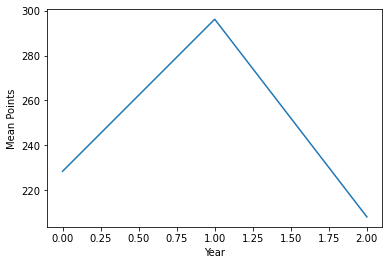

In [66]:
plt.plot([mean_2021, mean_2020, mean_2019])

plt.xlabel("Year")
plt.ylabel("Mean Points")

plt.show()

# 4. Conclusion, Learnings, and Points of Note

The assessment was a step up in difficulty from previous modules within the course. During the video lectures, a number of problems were discovered which were addressed during the lectures. Following the lectures there was still a large amount of work required which the approach to undertake had not been detailed in the course content. 

It is acknowldged the majority of the code is Ian Mcloughin's. Also, the assessment required a variety of manual importing of data which could have led to mistakes. In addition, it was not comparing like for like, as previously discussed. No checks have been undertaken to ensure data is correct and a number of assumptions were made (e.g. changing "NaN" to "0" which means the data is not correct. 

It is not felt that I have a full understanding of certain elements e.g. in relation to encoding or regular expressions. 

# 5. References

<b id="f1">1</b> https://pandas.pydata.org/docs/getting_started/overview.html [↩](#a1)

<b id="f2">2</b> https://matplotlib.org/stable/index.html [↩](#a2)

<b id="f3">3</b> https://scipy.org/install/ [↩](#a3)

<b id="f4">4</b> https://docs.python-requests.org/en/latest/ [↩](#a4)

<b id="f5">5</b> https://www.w3.org/Protocols/HTTP/HTRESP.html [↩](#a5)

<b id="f6">6</b> https://docs.python.org/3/library/re.html [↩](#a6)

<b id="f7">7</b> https://pandas.pydata.org/docs/reference/api/pandas.concat.html [↩](#a7)

<b id="f8">8</b> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html [↩](#a8)

<b id="f9">9</b> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html [↩](#a9)

<b id="f10">10</b> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html [↩](#a10)

<b id="f11">11</b> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html [↩](#a11)

<b id="f12">12</b> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html [↩](#a12)

<b id="f13">13</b> https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas [↩](#a13)

<b id="f14">14</b> https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/ [↩](#a14)

<b id="f15">15</b> https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe [↩](#a15)

<b id="f16">16</b> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html [↩](#a16)
